In [6]:
import pandas as pd
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,
                noise=0.03,
                random_state=42)
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


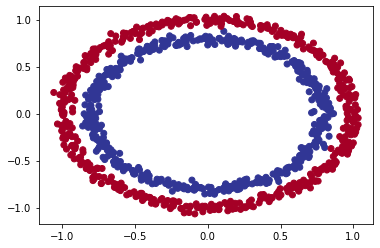

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

To predict non-linear dataset;
1- We should use relu activation
2- We can use adam with low learning rate


In [40]:
import tensorflow as tf
import numpy as np
# Set the random seed
tf.random.set_seed(42)

#Create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
    
    
    
])
# Compile the model
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=["accuracy"])
# Fit the model

model_1.fit(X,y,epochs=100,verbose=0)

In [41]:
# evaluate
model_1.evaluate(X,y)

32/32 [==============================] - 0s 748us/step - loss: 0.0254 - accuracy: 0.9930


[0.02537411078810692, 0.9929999709129333]

# Creating better Model

In [42]:
X_train,y_train= X[:800],y[:800]
X_test,y_test=X[800:],y[800:]

In [52]:
# Creating model
tf.random.set_seed(42)
model_2 =tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])
history=model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [53]:
# Evaluate the model on the test dataset
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9950


[0.0245087631046772, 0.9950000047683716]

In [54]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
...,...,...
95,0.038383,0.98875
96,0.037549,0.99000
97,0.036139,0.99250
98,0.035137,0.99250


<AxesSubplot:>

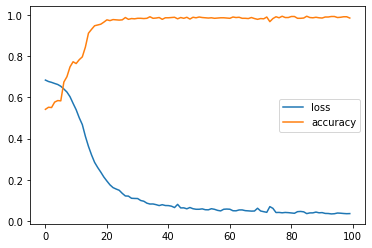

In [55]:
# plot the loss curver
pd.DataFrame(history.history).plot()

# Finding the best learning rate

In [59]:
# Creating model
tf.random.set_seed(42)
model_3 =tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
               optimizer="Adam",
                metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_3 = model_3.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 520us/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 440us/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 400us/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 400us/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 400us/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 440us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 400us/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 440us/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 440us/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 400us/step - loss: 0.6871 - accura

25/25 [==============================] - 0s 400us/step - loss: 0.7208 - accuracy: 0.4888
Epoch 82/100
25/25 [==============================] - 0s 440us/step - loss: 0.7132 - accuracy: 0.5412
Epoch 83/100
25/25 [==============================] - 0s 440us/step - loss: 0.7305 - accuracy: 0.4863
Epoch 84/100
25/25 [==============================] - 0s 400us/step - loss: 0.7097 - accuracy: 0.5013
Epoch 85/100
25/25 [==============================] - 0s 400us/step - loss: 0.7254 - accuracy: 0.5038
Epoch 86/100
25/25 [==============================] - 0s 400us/step - loss: 0.7770 - accuracy: 0.5063
Epoch 87/100
25/25 [==============================] - 0s 360us/step - loss: 0.7666 - accuracy: 0.5063
Epoch 88/100
25/25 [==============================] - 0s 360us/step - loss: 0.7564 - accuracy: 0.5163
Epoch 89/100
25/25 [==============================] - 0s 440us/step - loss: 0.7541 - accuracy: 0.4938
Epoch 90/100
25/25 [==============================] - 0s 400us/step - loss: 0.7807 - accuracy: 

<AxesSubplot:xlabel='epochs'>

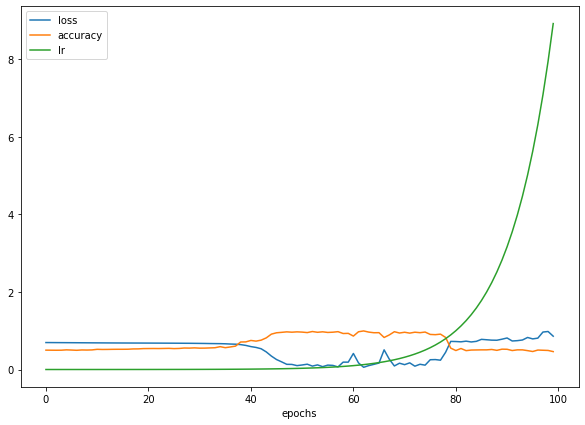

In [61]:
# Checkout the history
pd.DataFrame(history_3.history).plot(figsize=(10,7),xlabel="epochs")

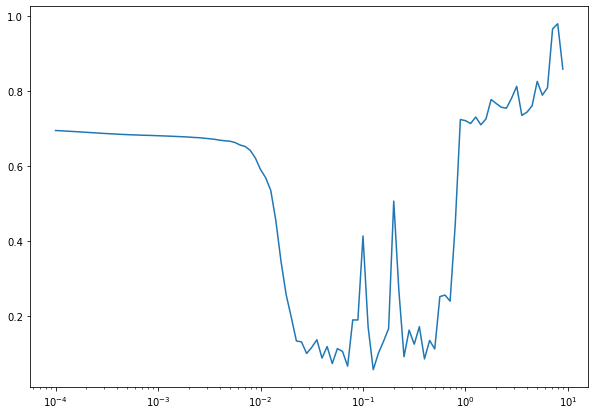

In [62]:
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_3.history["loss"])

In [65]:
# More classification evaluation methods
loss, accuracy = model_2.evaluate(X_test,y_test)
print(f"model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 573us/step - loss: 0.0245 - accuracy: 0.9950
model loss on the test set: 0.0245087631046772
Model accuracy on the test set: 99.50%


In [68]:
# Confussion Matrix

from sklearn.metrics import confusion_matrix

y_preds=model_2.predict(X_test)
confusion_matrix(y_test,tf.round(y_preds))

array([[100,   1],
       [  0,  99]], dtype=int64)